Does going to university in a different country affect your mental health? A Japanese international university surveyed its students in 2018 and published a study the following year that was approved by several ethical and regulatory boards.

The study found that international students have a higher risk of mental health difficulties than the general population, and that social connectedness (belonging to a social group) and acculturative stress (stress associated with joining a new culture) are predictive of depression.


Explore the `students` data using PostgreSQL to find out if you would come to a similar conclusion for international students and see if the length of stay is a contributing factor.

Here is a data description of the columns you may find helpful.

| Field Name    | Description                                      |
| ------------- | ------------------------------------------------ |
| `inter_dom`     | Types of students (international or domestic)   |
| `japanese_cate` | Japanese language proficiency                    |
| `english_cate`  | English language proficiency                     |
| `academic`      | Current academic level (undergraduate or graduate) |
| `age`           | Current age of student                           |
| `stay`          | Current length of stay in years                  |
| `todep`         | Total score of depression (PHQ-9 test)           |
| `tosc`          | Total score of social connectedness (SCS test)   |
| `toas`          | Total score of acculturative stress (ASISS test) |

<h1>Student data from PostSQL Database</h1>
<p>In this analysis, we are going to analyse the students data from PostSQL Data Base . Our objectives are : 
<ol>
    <li>Find the number of international students.</li>
    <li>their average scores by length of stay, in descending order of length of stay</li>
</ol>
</p>
<p class = "Intro"> <h2>Step of the Analysis</h2></p>
<ol>
    <li>Import the important and necessary module and library for this Case Study</li>
    <li>Import the data into data fram</li>
    <li>Analyse the data
    <ul>
        <li>Check the shape of the Data</li>
        <li>All the columns of the Data</li>
        <li>Describe and Summarize the Data</li>
        <li>All info about the Data</li>
        <li>Data types of each columns</li>
        <li>add the necessary columns</li>
    </ul>
    </li>
    <li>  <h3>Data Cleaning and Processing</h3>
        <p>In this section, we perform the following steps:
        <ul>
        <li>Check for missing value in the Data</li>
        <li>Drop all missing value </li>
        <li>Convert the columns to the corect Data types</li>
        <li>Count the value in each column</li>
        <li>Group the Data into category if necessary
        </li>
        <li>Number of unique Data in columns</li>
            <li>Sort the Data if needed</li>
        <li>Validate that the 'published' column, although given as an integer, represents a year. If required, it can be converted into a datetime object.</li>
        </ul> <br>
        It's important to note that many notebook creators may encounter issues when numeric values are stored as strings with commas. Our approach using the str.replace method followed by pd.to_numeric is robust in handling such errors. <br>
        We have to convert the occurent time into date time per hours, minutes. 
        </p>
    </li>
    <li><h3>Exploratory Data</h3>
    <ul>
        <h4>Visualize the Data</h4>
    </ul>
    </li>    
</ol>


In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [140]:
df = pd.read_csv("./Desktop/DATA ANALYSIS PROJECT/Project/workspace (1)/workspace/students.csv")

In [142]:
df

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
df.shape

(286, 50)

In [146]:
df.columns

Index(['inter_dom', 'region', 'gender', 'academic', 'age', 'age_cate', 'stay',
       'stay_cate', 'japanese', 'japanese_cate', 'english', 'english_cate',
       'intimate', 'religion', 'suicide', 'dep', 'deptype', 'todep', 'depsev',
       'tosc', 'apd', 'ahome', 'aph', 'afear', 'acs', 'aguilt', 'amiscell',
       'toas', 'partner', 'friends', 'parents', 'relative', 'profess',
       ' phone', 'doctor', 'reli', 'alone', 'others', 'internet', 'partner_bi',
       'friends_bi', 'parents_bi', 'relative_bi', 'professional_bi',
       'phone_bi', 'doctor_bi', 'religion_bi', 'alone_bi', 'others_bi',
       'internet_bi'],
      dtype='object')

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 50 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   inter_dom        268 non-null    object 
 1   region           268 non-null    object 
 2   gender           268 non-null    object 
 3   academic         268 non-null    object 
 4   age              268 non-null    float64
 5   age_cate         268 non-null    float64
 6   stay             268 non-null    float64
 7   stay_cate        268 non-null    object 
 8   japanese         268 non-null    float64
 9   japanese_cate    268 non-null    object 
 10  english          268 non-null    float64
 11  english_cate     268 non-null    object 
 12  intimate         260 non-null    object 
 13  religion         268 non-null    object 
 14  suicide          268 non-null    object 
 15  dep              270 non-null    object 
 16  deptype          271 non-null    object 
 17  todep           

In [150]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,268.0,20.873134,2.765279,17.0,19.0,20.0,22.00,31.0
age_cate,268.0,2.559701,1.070624,1.0,2.0,2.0,3.00,5.0
stay,268.0,2.149254,1.326805,1.0,1.0,2.0,3.00,10.0
japanese,268.0,3.097015,1.306104,1.0,2.0,3.0,4.00,5.0
english,268.0,3.649254,0.880564,1.0,3.0,4.0,4.00,5.0
todep,268.0,8.186567,4.954728,0.0,5.0,8.0,11.00,25.0
tosc,268.0,37.473881,9.234120,8.0,31.0,40.0,46.00,48.0
apd,268.0,15.414179,6.174439,8.0,10.0,16.0,19.00,39.0
ahome,268.0,9.608209,4.011156,4.0,6.0,9.0,12.00,20.0
aph,268.0,9.138060,4.194651,5.0,5.0,9.0,11.00,25.0


In [162]:
df.isna().sum()

inter_dom          0
region             0
gender             0
academic           0
age                0
age_cate           0
stay               0
stay_cate          0
japanese           0
japanese_cate      0
english            0
english_cate       0
intimate           0
religion           0
suicide            0
dep                0
deptype            0
todep              0
depsev             0
tosc               0
apd                0
ahome              0
aph                0
afear              0
acs                0
aguilt             0
amiscell           0
toas               0
partner            0
friends            0
parents            0
relative           0
profess            0
 phone             0
doctor             0
reli               0
alone              0
others             0
internet           0
partner_bi         0
friends_bi         0
parents_bi         0
relative_bi        0
professional_bi    0
phone_bi           0
doctor_bi          0
religion_bi        0
alone_bi     

In [164]:
df.dropna(inplace=True)

In [166]:
df

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi,average_phq
25,Inter,Others,Female,Grad,25.0,4.0,8.0,Long,4.0,High,...,No,No,No,No,No,No,No,No,No,8.549587
26,Inter,SEA,Female,Grad,30.0,5.0,2.0,Medium,3.0,Average,...,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,8.549587
27,Inter,SEA,Female,Under,17.0,1.0,1.0,Short,2.0,Low,...,No,No,No,No,No,No,No,No,No,8.549587
28,Inter,SEA,Female,Under,20.0,2.0,2.0,Medium,3.0,Average,...,No,No,No,No,No,No,No,No,No,8.549587
29,Inter,EA,Male,Under,19.0,2.0,1.0,Short,3.0,Average,...,No,No,No,No,No,No,No,No,No,8.549587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21.0,3.0,4.0,Long,5.0,High,...,Yes,No,No,No,No,No,No,No,Yes,8.549587
264,Dom,JAP,Female,Under,22.0,3.0,3.0,Medium,3.0,Average,...,Yes,Yes,No,No,No,No,No,No,No,8.549587
265,Dom,JAP,Female,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,No,No,No,No,8.549587
266,Dom,JAP,Male,Under,19.0,2.0,1.0,Short,5.0,High,...,Yes,Yes,Yes,Yes,Yes,No,No,No,No,8.549587


In [168]:
df["average_phq"] = df["todep"].mean()

In [170]:
df["average_phq"].tail()

263    8.549587
264    8.549587
265    8.549587
266    8.549587
267    8.549587
Name: average_phq, dtype: float64

In [172]:
df["average_scs"]= df["tosc"].mean()
df["average_as"]= df["toas"].mean()

In [174]:
df["average_scs"] = round(df["average_scs"],2)
df["average_as"] = round(df["average_as"],2)
df["average_phq"] =round(df["average_phq"],2)

In [177]:
df1 = df[["stay","average_phq" ,"average_scs", "average_as", "inter_dom"]]

In [179]:
df1[df1["inter_dom"]=="Inter"].sort_values(by = "stay", ascending= False)

,stay,average_phq,average_scs,average_as,inter_dom
38,10.0,8.55,37.33,71.96,Inter
25,8.0,8.55,37.33,71.96,Inter
191,7.0,8.55,37.33,71.96,Inter
127,6.0,8.55,37.33,71.96,Inter
186,4.0,8.55,37.33,71.96,Inter
...,...,...,...,...,...
71,1.0,8.55,37.33,71.96,Inter
73,1.0,8.55,37.33,71.96,Inter
132,1.0,8.55,37.33,71.96,Inter
131,1.0,8.55,37.33,71.96,Inter


<h2>Visualization</h2>

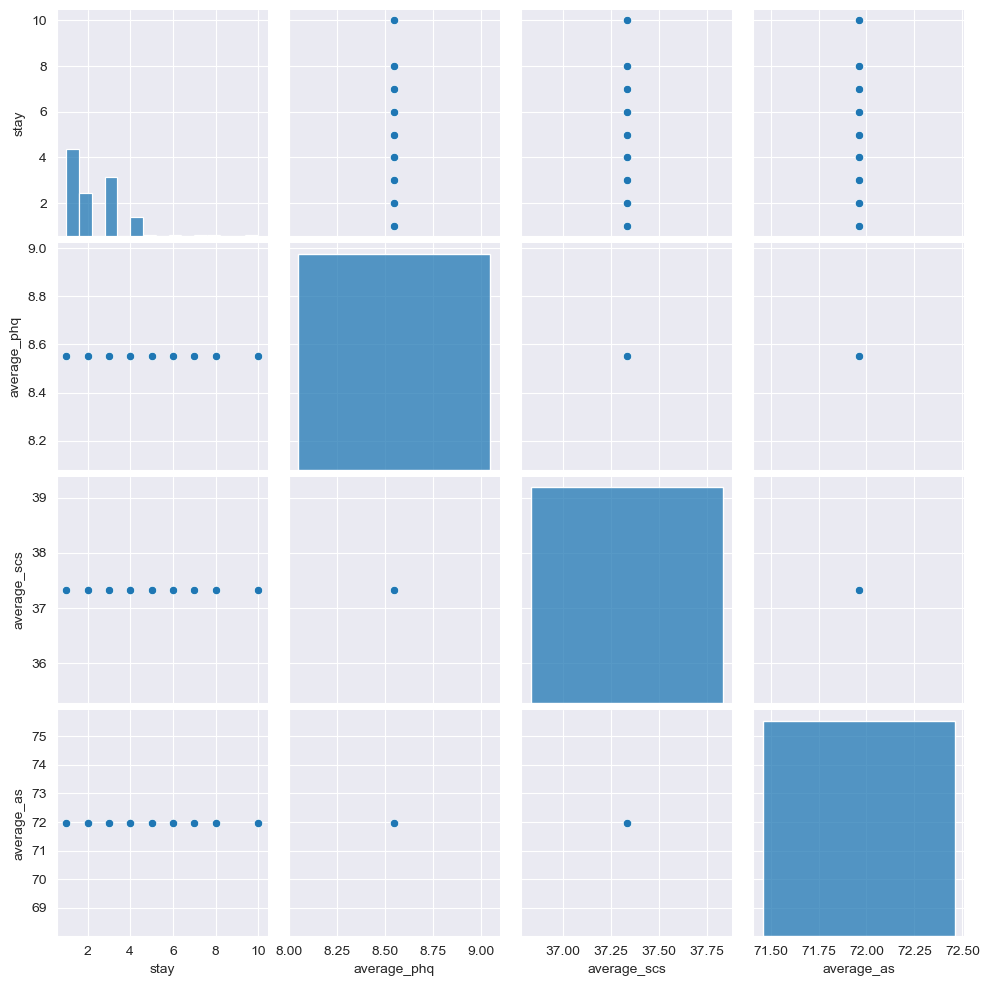

In [182]:
sns.set_style("darkgrid")
sns.pairplot(df1)

<Axes: >

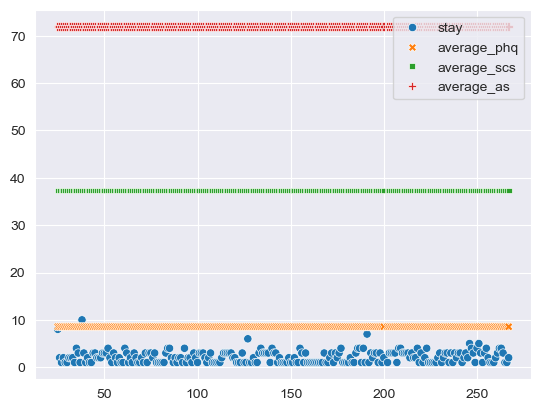

In [198]:
sns.scatterplot(df1)

<h2>
    Author : 
     <h6>WEDSON PETIT HOMME </h6>
    <br>
    <h4> Contact :</h4>
    <li>Email : wedsonpetithomme0@gmail.com</li>
    <li> <a href = "https://www.linkedin.com/"> Linkedin :</a><a href = "https://www.linkedin.com/in/wedson-petithomme-947571239/">wedson-petit-homme-947571239 </a></li>
    <li><a href = "https://github.com/ALYProdz">GitHub :</a><a href = "https://github.com/ALYProdz">Wedson (ALYProdz) </a> </li>
    <li><a href = "https://x.com/"> X(Twitter) :</a> @WedsonPh97</li>
    <li><a href = https://www.datacamp.com/portfolio/wedsonpetithomme> Datacamp :</a><a href = "https://www.datacamp.com/portfolio/wedsonpetithomme"> WEDSON PETIT HOMME</a></li>
</h2>
